# Final Project

### Author: Joseph Wong

#### Package Imports

In [1]:
# NOTE - This list of package imports is getting long
# In a professional setting you would only want to 
#      import what you need!
# I had chatGPT break the packages into groups here

# ============================================================
# Basic packages
# ============================================================
import os                             # For file and directory operations
import numpy as np                    # For numerical computing and arrays
import pandas as pd                   # For data manipulation and analysis

# ============================================================
# Visualization packages
# ============================================================
import matplotlib.pyplot as plt        # Static 2D plotting
from matplotlib.colors import ListedColormap
import seaborn as sns                  # Statistical data visualization built on matplotlib

# Interactive visualization with Plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'        # Set renderer for interactive output in Colab or notebooks

# ============================================================
# Scikit-learn: Core utilities for model building and evaluation
# ============================================================
from sklearn.model_selection import train_test_split    # Train/test data splitting
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler  # Feature transformations and scaling
from sklearn.metrics import (                            # Model evaluation metrics
    mean_squared_error, r2_score, accuracy_score, 
    precision_score, recall_score, confusion_matrix, 
    classification_report
)

# ============================================================
# Scikit-learn: Linear and polynomial models
# ============================================================
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor       # For KNN

# ============================================================
# Scikit-learn: Synthetic dataset generators
# ============================================================
from sklearn.datasets import make_classification, make_regression

# ============================================================
# Scikit-learn: Naive Bayes models
# ============================================================
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# ============================================================
# Scikit-learn: Text feature extraction
# ============================================================
from sklearn.feature_extraction.text import CountVectorizer

# ============================================================
# Scikit-learn: Decision Trees
# ============================================================
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# ============================================================
# Scikit-learn: Dimentionality Reduction
# ============================================================
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ============================================================
# Scikit-learn: Cross-Validation and Parameter Searches
# ============================================================

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ============================================================
# Scikit-learn: Defining model pipelines
# ============================================================
from sklearn.pipeline import Pipeline

## Abstract

In this project, I am going to investigate some potential factors for insurance premiums and number of medical services used in Spain in 2019. Using decision tree regressors, we can analyze feature importances to determine what variables are most influential in prediction. This revealed that age and type of policy were most important for predicting premiums and age and premium were most important for predicting number of medical services. However, the models were not very predictive so our findings are somewhat inconclusive.

## Introduction and Background

Insurance is a helpful tool to provide financial security against large unexpected losses. Namely, health insurance ensures that individuals can receive the care they need to stay healthy. But how are premiums decided? The cost individuals pay to stay insured is a relevant topic, as it dictates what communities have accessible insurance. Finding ways to provide accessible health insurance to a wider range of communities will allow for more accessible healthcare. Through this analysis, I will explore factors that influence premiums and hopefully determine which are most impactful. Additionally, I will take a look at the number of medical services used to see if there are any trends. This could help reduce the number of services needed in a year.

## Data Used

The dataset was published by Josep Lledó, Priscila Espinosa Adamez, and Virgilio Perez Gimenez from the Universitat de Valencia on 26 November 2025. The data regards non-life health insurance policies in Spain from 2017-2019 and appears to be real, not synthetic. There are 228,711 rows and 42 columns, with each row representing a insured (individual) policy. We will only focus on 9 of these columns and data from 2019 (76282 observations). There does not seem to be privacy concerns with the data, as each individual is represented by an ID number. The only other personal features could be gender and age, which alone cannot be used for identifying individuals. Since the data only concerns insurance in Spain, our findings will be more applicable to those regions. There does not appear to be large biases in the data.

*Dataset Citation: Lledó, Josep; Espinosa Adamez, Priscila; Perez Gimenez, Virgilio (2025), “Dataset of health insurance portfolio”, Mendeley Data, V4, doi: 10.17632/386vmj2tbk.4*

#### Data Import

In [2]:
# main dataset
file = "Dataset of health insurance portfolio.xlsx"
df_raw = pd.read_excel(file)
mask = df_raw['period'] == 2019
cols = ['type_policy', 'type_product', 'reimbursement', 'distribution_channel', 'gender', 'age', 'premium', 'cost_claims_year', 'n_medical_services']
df = df_raw[mask][cols].copy()
df.head()

# variable description dataset
file = "Descriptive of the variables.xlsx"
df_var_raw = pd.read_excel(file)
df_var = df_var_raw[df_var_raw['Variables'].isin(df.keys())].copy()

### Variable Descriptions

In [3]:
# code from ChatGPT to neatly display variable descriptions
for _, row in df_var.iterrows():
    print(f"Variable: {row['Variables']}")
    print(f"Description: {row['Description']}")
    print(f"Expanded description: {row['Expanded description']}")
    print("-" * 40)

Variable: type_policy
Description: (Generic)  policy  type,  indicating  whether  the  policy  is I:  Individual, C:  Collective.
Expanded description: Categorical classification of the policy according to internal product structure. Indicates whether the policy corresponds to an individual policy (I) or a collective/group policy (C),
----------------------------------------
Variable: type_product
Description: (Generic)  policy  Coverage. D:  Dental, P:  Premium, S:  Standard, I:  International.
Expanded description: type_product identifies the generic level of insurance coverage associated with the policy. This variable differentiates products primarily by the scope and extent of healthcare benefits, which is relevant for segmentation, claim cost analysis, and pricing or underwriting studies:
- D (Dental): The policy provides dental coverage as the primary benefit. Coverage focuses on dental consultations, treatments, and procedures, with medical coverage either excluded or minimal.
-

### NaNs

In [4]:
df.isna().sum()

type_policy             0
type_product            0
reimbursement           0
distribution_channel    0
gender                  0
age                     0
premium                 0
cost_claims_year        0
n_medical_services      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76282 entries, 152429 to 228710
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type_policy           76282 non-null  object 
 1   type_product          76282 non-null  object 
 2   reimbursement         76282 non-null  object 
 3   distribution_channel  76282 non-null  object 
 4   gender                76282 non-null  object 
 5   age                   76282 non-null  int64  
 6   premium               76282 non-null  float64
 7   cost_claims_year      76282 non-null  float64
 8   n_medical_services    76282 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.8+ MB


There are no NaNs in the dataset. There are 4 numerical and 5 categorical variables. All data types appear to match what they should be.

## Exploratory Data Analysis

In [6]:
df.describe()

,age,premium,cost_claims_year,n_medical_services
count,76282.000000,76282.000000,76282.000000,76282.000000
mean,44.017658,865.171973,570.585535,19.539669
std,23.148350,572.047593,1590.329388,32.795155
min,0.000000,34.190400,0.000000,0.000000
25%,28.000000,507.271500,0.000000,0.000000
50%,44.000000,754.598600,176.412850,6.000000
75%,62.000000,1064.999850,525.183350,28.000000
max,99.000000,22318.048800,56790.098200,3094.000000


Age ranges from 0 to 99, with a median of 44. The distribution for age does not appear to have outliers. It seems that premium is skewed right, as its median of 745.0790 is much closer to its minimum (34.1904) than its maximum (22318.0488). Cost of claims and number of medical services seem to have a smiliar trend in distribution. We will analyze these columns' potential skewness further.

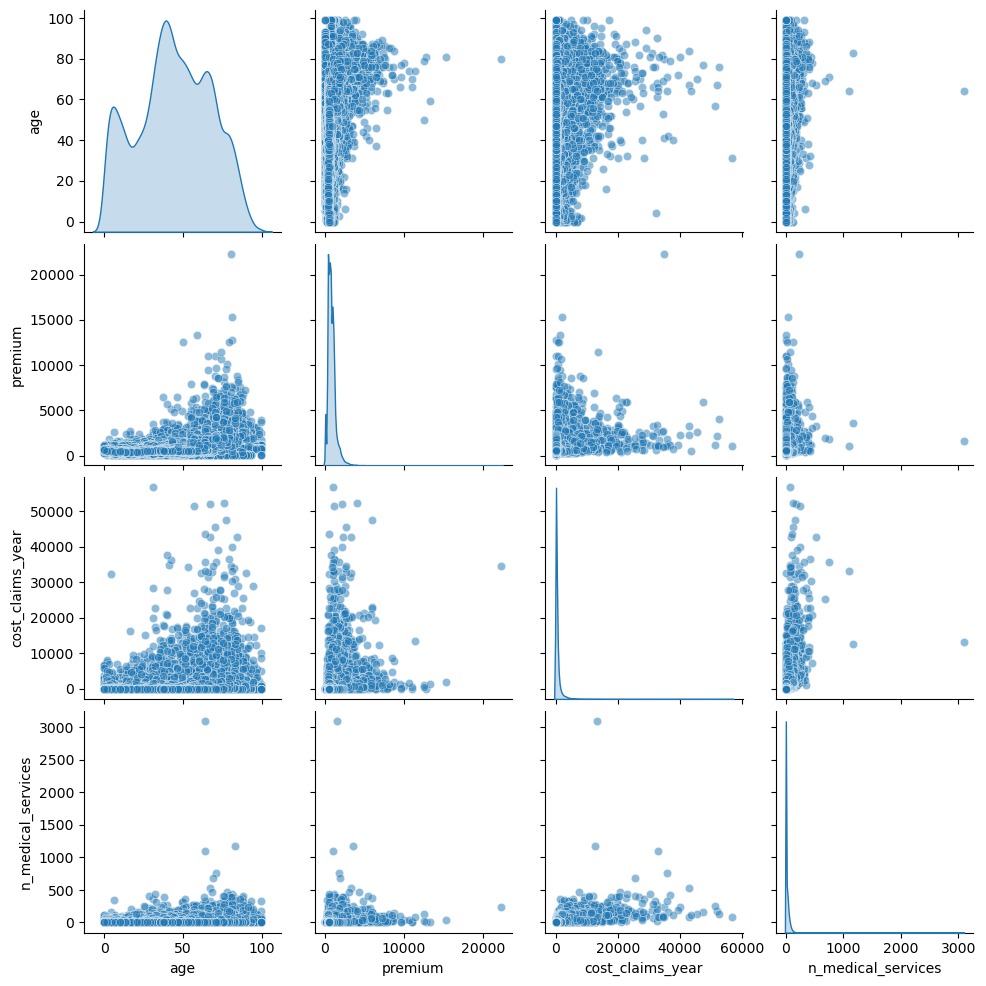

In [7]:
num_cols = df.select_dtypes(include=[np.number]).keys()
sns.pairplot(df[num_cols], diag_kind="kde", plot_kws={"alpha": 0.5})
plt.show()

The distributions for premiums, cost of claims during the year, and number of medical services indeed appear to be skewed right. Cost of claims and number of medical services specifically have many observations with values of 0. These three variables may have some outliers with very large values. We should keep an eye on these and take precautions when analyzing results. As far as two variable relationships go, there does not seem to be strong multicollinearity. There may be a trend between age and premium, where premium increases alongside age.

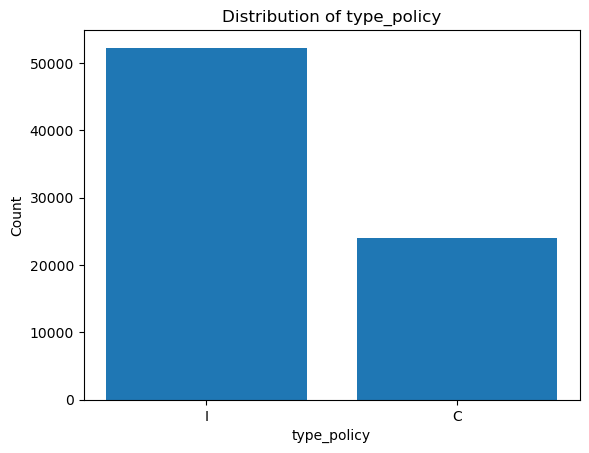

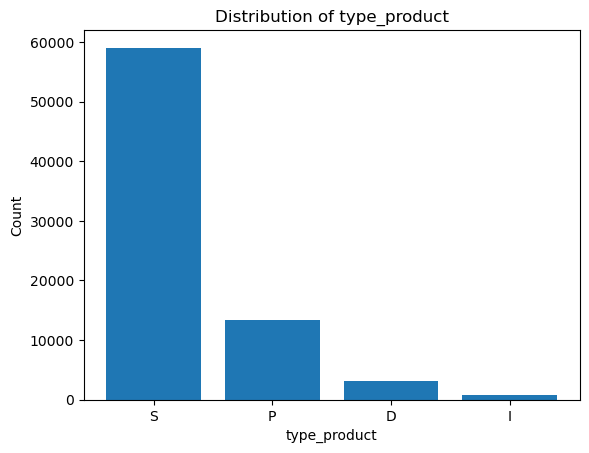

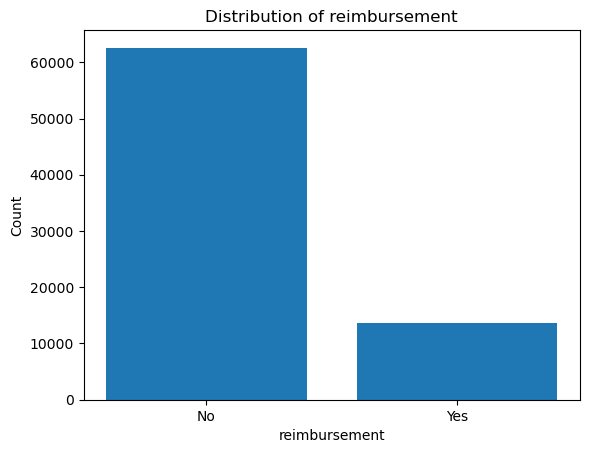

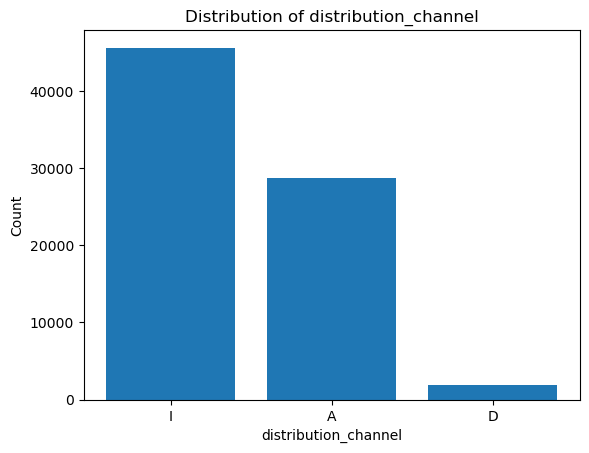

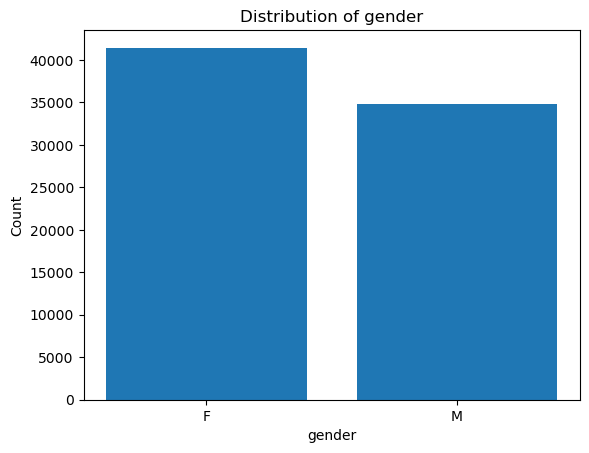

In [8]:
cat_cols = df.select_dtypes(include=['object']).keys()
for col in cat_cols:
    counts = df[col].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

These are bar plots for the categorical variables. There are roughly double the number of individual (I) policies than collective (C). Most policy coverages are standard (S), with very few being international (I). The majority of policies do not offer reimbursements. An insurance intermediary (I) is the most common distribution channel, followed somewhat closely by an agency (A), and finally direct business (D) has very few observations. The dataset represents a larger proportion of females compared to males. Since many of the categorical variables are not well-balanced, we should take precautions when analyzing them.

## Proposed Questions

Some questions I will investigate are:
- What features have greatest importance in predicting premium?
- What features have greatest importance in predicting the number of medical services used in a year?

To explore these questions, I will create models to predict the target variable. The model will be a decision tree regressor so that we can run feature importance on it. These values will help us determine which features are most influential in prediction.

## Analysis and Results

## What features have greatest importance in predicting premium?

### Test Train Validate Split

In [9]:
# one-hot encode categorical cols to get numerical values
df_encoded = pd.get_dummies(df, columns=cat_cols, dtype=int)

x_cols = ['age', 'cost_claims_year', 'n_medical_services', 'type_policy_C', 'type_policy_I', 'type_product_D', 'type_product_I', 'type_product_P', 'type_product_S', 'reimbursement_No', 'reimbursement_Yes', 'distribution_channel_A', 'distribution_channel_D', 'distribution_channel_I', 'gender_F', 'gender_M']
y_cols = ['premium']

X = df_encoded[x_cols]
y = df_encoded[y_cols]

# first split: hold out test data
seed = 16
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=0.2, random_state=seed)

# second split: create a validation set from the testing data
X_test, X_val, y_test, y_val = train_test_split(X_test_full, y_test_full, test_size=0.5, random_state=seed)

# final proportions are 80% train / 10% val / 10% test
print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

Train: 61025, Validation: 7629, Test: 7628


### Data Normalization

In [10]:
# define the scalar
scaler = StandardScaler()
# find mu and sigma of the training data and transform the training data
X_train_sc = scaler.fit_transform(X_train)
# transform the validation data
X_val_sc = scaler.transform(X_val)
# transform the test data
X_test_sc = scaler.transform(X_test)

### Decision Tree Regressor

We will use a decision tree regressor as our model so we can determine feature importance. In the pipeline, we will use a randomized search to find optimized parameters efficiently. Also, we will use the negative mean squared error because the score is maximized by sklearn (and we want to minimize the positive mean squared error).

In [11]:
seed = 16
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=seed))
])

param_dist = {
'model__max_depth': np.arange(2,30,1),
'model__ccp_alpha': np.arange(0,0.05,0.0001)
}

rand_search_pipe = RandomizedSearchCV(pipe, param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error')

# not X_train_sc because the pipeline scales it automatically
rand_search_pipe.fit(X_train, y_train)

print("Best parameters:", rand_search_pipe.best_params_)
print("Best CV score:", rand_search_pipe.best_score_)

Best parameters: {'model__max_depth': np.int64(6), 'model__ccp_alpha': np.float64(0.036500000000000005)}
Best CV score: -157211.15565085335


The optimized max depth is 6 and the optimized cpp alpha is 0.008. Since these values are not the borders of our range of values, we do not need to alter the range of parameters we will test.

In [12]:
depth = rand_search_pipe.best_params_.get('model__max_depth')
alpha = rand_search_pipe.best_params_.get('model__ccp_alpha')

model = DecisionTreeRegressor(random_state=seed, max_depth=depth, ccp_alpha=alpha)
model.fit(X_train_sc, y_train)

# evaluate training set
y_pred_train = model.predict(X_train_sc)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Training Data:")
print(f"MSE: {mse_train:.3f}")
print(f"R²: {r2_train:.3f}")

# evaluate validate set
y_pred_val = model.predict(X_val_sc)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("\nValidation Data:")
print(f"MSE: {mse_val:.3f}")
print(f"R²: {r2_val:.3f}")

# evaluate test set
y_pred_test = model.predict(X_test_sc)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("\nTesting Data:")
print(f"MSE: {mse_test:.3f}")
print(f"R²: {r2_test:.3f}")

Training Data:
MSE: 155640.446
R²: 0.532

Validation Data:
MSE: 141516.664
R²: 0.544

Testing Data:
MSE: 129237.149
R²: 0.570


The testing data has an R² of 0.570, which is not amazing. The training and validate data have R² of 0.532 and 0.544 respectively, so at least the model is not overfit. However, it seems that there is some underfitting happening.

age                       5.627863e-01
type_product_D            1.970416e-01
type_policy_C             1.697014e-01
type_product_S            3.234170e-02
cost_claims_year          3.112243e-02
distribution_channel_D    2.816513e-03
type_product_P            1.451979e-03
type_policy_I             1.247870e-03
reimbursement_Yes         7.733606e-04
n_medical_services        5.432845e-04
distribution_channel_A    1.727911e-04
distribution_channel_I    8.393113e-07
type_product_I            0.000000e+00
reimbursement_No          0.000000e+00
gender_F                  0.000000e+00
gender_M                  0.000000e+00
dtype: float64


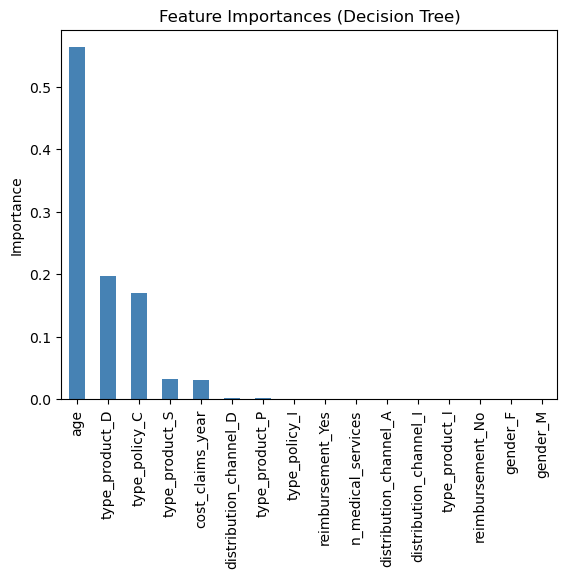

In [13]:
# feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

importances.plot(kind='bar', color='steelblue', title='Feature Importances (Decision Tree)')
plt.ylabel("Importance")
plt.show()

'age', 'type_product_D', 'type_policy_C', 'type_product_S', and 'cost_claims_year' are the top 5 most important variables. By far, age is the most important factor for predicting premium. Whether the policy provide dental coverage as the primary benefit and whether the policy type is collective also have relatively high importance. This suggests factors relating to the policy directly (such as its type or what it covers) are more important than most other personal factors, like number of medical services. However, it is crucial to note that our model does not have very strong predictive ability. Therefore, our results should be taken cautiously, as they are based on a somewhat flawed model.

## What features have greatest importance in predicting the number of medical services used in a year?

### Test Train Validate Split

In [14]:
# one-hot encode categorical cols to get numerical values
df_encoded = pd.get_dummies(df, columns=cat_cols, dtype=int)

x_cols = ['age', 'premium', 'type_policy_C', 'type_policy_I', 'type_product_D', 'type_product_I', 'type_product_P', 'type_product_S', 'reimbursement_No', 'reimbursement_Yes', 'distribution_channel_A', 'distribution_channel_D', 'distribution_channel_I', 'gender_F', 'gender_M']
y_cols = ['n_medical_services']

X = df_encoded[x_cols]
y = df_encoded[y_cols]

# first split: hold out test data
seed = 16
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=0.2, random_state=seed)

# second split: create a validation set from the testing data
X_test, X_val, y_test, y_val = train_test_split(X_test_full, y_test_full, test_size=0.5, random_state=seed)

# final proportions are 80% train / 10% val / 10% test
print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

Train: 61025, Validation: 7629, Test: 7628


I did not include 'cost_claims_year' as a feature because it is correlated to the number of medical services used. Running a model with this feature would not tell us anything interesting about what influences the number of services.

### Data Normalization

In [15]:
# define the scalar
scaler = StandardScaler()
# find mu and sigma of the training data and transform the training data
X_train_sc = scaler.fit_transform(X_train)
# transform the validation data
X_val_sc = scaler.transform(X_val)
# transform the test data
X_test_sc = scaler.transform(X_test)

### Decision Tree Regressor

In [16]:
seed = 16
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=seed))
])

param_dist = {
'model__max_depth': np.arange(2,30,1),
'model__ccp_alpha': np.arange(0,0.05,0.0001)
}

rand_search_pipe = RandomizedSearchCV(pipe, param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error')

# not X_train_sc because the pipeline scales it automatically
rand_search_pipe.fit(X_train, y_train)

print("Best parameters:", rand_search_pipe.best_params_)
print("Best CV score:", rand_search_pipe.best_score_)

Best parameters: {'model__max_depth': np.int64(6), 'model__ccp_alpha': np.float64(0.0067)}
Best CV score: -796.7995122218811


The optimized max depth is 5 and the optimized cpp alpha is around 0.0466. Since these values are not the borders of our range of values, we do not need to alter the range of parameters we will test.

In [17]:
depth = rand_search_pipe.best_params_.get('model__max_depth')
alpha = rand_search_pipe.best_params_.get('model__ccp_alpha')

model = DecisionTreeRegressor(random_state=seed, max_depth=depth, ccp_alpha=alpha)
model.fit(X_train_sc, y_train)

# evaluate training set
y_pred_train = model.predict(X_train_sc)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Training Data:")
print(f"MSE: {mse_train:.3f}")
print(f"R²: {r2_train:.3f}")

# evaluate validate set
y_pred_val = model.predict(X_val_sc)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("\nValidation Data:")
print(f"MSE: {mse_val:.3f}")
print(f"R²: {r2_val:.3f}")

# evaluate test set
y_pred_test = model.predict(X_test_sc)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("\nTesting Data:")
print(f"MSE: {mse_test:.3f}")
print(f"R²: {r2_test:.3f}")

Training Data:
MSE: 785.058
R²: 0.169

Validation Data:
MSE: 759.401
R²: 0.163

Testing Data:
MSE: 2123.960
R²: 0.073


The testing data has an R² of 0.073, which is concerningly low. The training and validate data have R² of 0.161 and 0.163 respectively, which are also concerningly low. This suggests the model is very underfit and its predictive ability is very low. So, the results about feature importance should be critically analyzed.

age                       0.537227
premium                   0.360452
gender_F                  0.050203
type_policy_I             0.044164
distribution_channel_D    0.003315
type_product_S            0.002063
type_policy_C             0.001735
distribution_channel_I    0.000486
type_product_P            0.000355
type_product_I            0.000000
type_product_D            0.000000
distribution_channel_A    0.000000
reimbursement_Yes         0.000000
reimbursement_No          0.000000
gender_M                  0.000000
dtype: float64


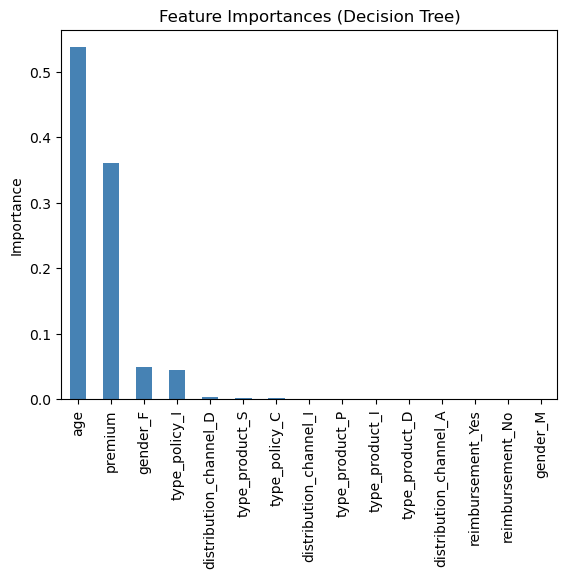

In [18]:
# feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

importances.plot(kind='bar', color='steelblue', title='Feature Importances (Decision Tree)')
plt.ylabel("Importance")
plt.show()

'age', 'premium', 'gender_M', 'type_policy_C', 'type_policy_I' are the top 5 most important variables. Age is very important, but premium is not far behind it. Gender and whether a policy is collective or individual have slight significance in the model. Unfortunately, the model is not very predictive, so the feature importances may be misaligned. But, it does make logical sense that age would have a role in determing the number of medical services needed.

## Conclusion

In this project, I have analyzed what factors influence two variables: premium and number of medical services. To determine which features are most important, I built decision tree regressors. Although the predictiveness of the premium model was not the best, it still revealed that age is the most important variable in predicting premium, following by whether it is a dental policy and whether it is a collective policy. For the number of medical services model, its predictiveness was honestly really bad. Running feature importance on that model showed us that age and then premium were the most important features for prediction. However, the model's lack of predictive ability makes these results somewhat untrustworthy. Since the dataset was fairly unbiased and maintained privacy, the results seem to be ethical, but there could be other considerations I am not taking into acount. Although the results were somewhat inconclusive, there is room for improvement in future projects. If we analyze other factors, the models predictive ability may improve, allowing for more definitive conclusions.